とってくるサイト→https://note.com/  
ドキュメント→https://www.crummy.com/software/BeautifulSoup/bs4/doc/#a-string  


ブログのURLの一覧を取得できれば簡単に処理の自動化ができそうです

リクエスでURLを抜き取る→そこからスープで解析

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import json

"https://note.com/api/v2/creators/seiburogu/contents?kind=note&disabled_pinned=false&with_notes=false&page="

辞書からurlを取得する  
jsonを返すurlと記事の総数を繰り返しのレンジとして与えます  


In [ ]:
def get_url(url, ranges):
  url = url
  use_urls = []
  #jsonに変換してurlを抽出
  urls = requests.get(url)
  texts = urls.text
  data = json.loads(texts)
  for i in range(ranges):
    use_url = data["data"]["contents"][i]["noteUrl"]
    use_urls.append(use_url)
  return use_urls

In [ ]:
get_URL = get_url("https://note.com/api/v2/creators/seiburogu/contents?kind=note&disabled_pinned=false&with_notes=false&page=",5)

In [ ]:
get_URL

['https://note.com/seiburogu/n/n1519a2903270',
 'https://note.com/seiburogu/n/n28876d75bf74',
 'https://note.com/seiburogu/n/n02ead225cfcc',
 'https://note.com/seiburogu/n/n8d7573cfb728',
 'https://note.com/seiburogu/n/n82ea99511973']

In [ ]:
def cs_text(url):
  all_url = url
  for i in range(len(all_url)):
    single_url = all_url[i]
    response = requests.get(single_url)
    response.text[:1000000]
    soup = BeautifulSoup(response.text, 'html.parser')
    for tag in soup.find_all(re.compile("^p")):
      print(tag.get_text())



In [ ]:
cs_text(get_URL)



おはようございますseiと申します
９月の半ばに、ルームシェアをしようと考えていたのですが、書類を集めたり、友人と予定を合わしたり、審査が通るのか？等様々な問題が出てきて本当に出来るのか？と心が折れそうです。
ですが、心が沸き上がるほど、楽しみでもあります。
見ていただきありがとうございました。


おはようございますseiと申します。しばらく投稿出来ず、申し訳ありませんでした。
先日、賃貸物件をみてきたのですが、どの家もリフォームされており、綺麗でした。契約には移れていないのですが、準備することが多く、今から楽しみですね。



はじめましておはようございます自称ミニマリストのseiと申します。
２年年前私は物に時間や思考を奪われ、何も出来ない無い日々が続いていました。
ある時、友人が何で物を捨てないの？と問いかけてきて、そのときの私は、「何でだ？」と言う疑問を抱えました。
その日から、物を捨てる決意をしましたが、何から捨てて良いのかわからず、半年ほど同じ現状を保っておりました。
ミニマリスト関連の動画を観ていたら、自分が「３ヶ月使用していない物は、捨てなさい」と言う言葉を信じ実行してみました。
あっと言う間に、物が半分になりました。そのときは、達成感があり、その後２ヶ月、１ヶ月と期間を減らし最後には、必要な物しか残りませんでしたね。
私は、物を増やさない為に１つの縛りを掛けました。それは、１つ物を購入したときは、１つ物を手放すという事をしました。
あまりにも厳しいため、例外を設けました。自己投資に関することであれば、ある程度許容すると決めました。
皆様もしてみてください
本日は見ていただきありがとうございました。


はじめましてこんばんはseiと申します。
今年から私は、友達と何かスポーツを始めたいと思い筋トレを始めました。ですが、毎年筋トレをしていたのですが、二ヶ月と続ける事が出来ませんでした。
今年も去年と同じように二ヶ月も続ける事が出来ないと思っておりましたが、筋トレは半年も続ける事ができて、かつ、ボルダリングを始めることが出来ました。
結局何が言いたいかと言うと、覚悟と時間が無ければ、私は続ける事が出来ないと言うことが分かりました。
続ける事によってデメリットとメリットが発生しました。
①毎日二時間ボルダリングに時間が取られると言うこと②早い時間と

関数化して適応

In [ ]:
# url = "seiburogu/n/n1519a2903270"
for i in range(1, 5):
  cs_text(f"{i}")

おはようございますseiと申します９月の半ばに、ルームシェアをしようと考えていたのですが、書類を集めたり、友人と予定を合わしたり、審査が通るのか？等様々な問題が出てきて本当に出来るのか？と心が折れそうです。ですが、心が沸き上がるほど、楽しみでもあります。見ていただきありがとうございました。おはようございますseiと申します９月の半ばに、ルームシェアをしようと考えていたのですが、書類を集めたり、友人と予定を合わしたり、審査が通るのか？等様々な問題が出てきて本当に出来るのか？と心が折れそうです。ですが、心が沸き上がるほど、楽しみでもあります。見ていただきありがとうございました。おはようございますseiと申します９月の半ばに、ルームシェアをしようと考えていたのですが、書類を集めたり、友人と予定を合わしたり、審査が通るのか？等様々な問題が出てきて本当に出来るのか？と心が折れそうです。ですが、心が沸き上がるほど、楽しみでもあります。見ていただきありがとうございました。おはようございますseiと申します９月の半ばに、ルームシェアをしようと考えていたのですが、書類を集めたり、友人と予定を合わしたり、審査が通るのか？等様々な問題が出てきて本当に出来るのか？と心が折れそうです。ですが、心が沸き上がるほど、楽しみでもあります。見ていただきありがとうございました。おはようございますseiと申します９月の半ばに、ルームシェアをしようと考えていたのですが、書類を集めたり、友人と予定を合わしたり、審査が通るのか？等様々な問題が出てきて本当に出来るのか？と心が折れそうです。ですが、心が沸き上がるほど、楽しみでもあります。見ていただきありがとうございました。

URLの指定

'<!doctype html>\n<html data-n-head-ssr lang="ja" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ja%22%7D%7D">\n  <head >\n    <title>ルームシェアは難しい｜日常ブログ sei｜note</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1.0"><meta data-n-head="ssr" http-equiv="X-UA-Compatible" content="IE=10"><meta data-n-head="ssr" data-hid="description" name="description" content="おはようございます seiと申します  思い通りにいかない  ９月の半ばに、ルームシェアをしようと考えていたのですが、書類を集めたり、友人と予定を合わしたり、審査が通るのか？等様々な問題が出てきて本当に出来るのか？と心が折れそうです。  ですが、心が沸き上がるほど、楽しみでもあります。  見ていただきありがとうございました。"><meta data-n-head="ssr" data-hid="og:site_name" property="og:site_name" content="note（ノート）"><meta data-n-head="ssr" data-hid="og:url" property="og:url" content="https://note.com/seiburogu/n/n1519a2903270"><meta data-n-head="ssr" data-hid="og:title" property="og:title" content="ルームシェアは難しい｜日常ブログ sei｜note"><meta data-n-head="ssr" data-hid="og:description" property="og:description" content="おはようございます 
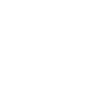

In [ ]:
# url = "https://note.com/seiburogu/n/n1519a2903270"
# response = requests.get(url)
# response.text[:1000000]

解析、テキスト取得

In [ ]:
# soup = BeautifulSoup(response.text, 'html.parser')
# type(soup)

bs4.BeautifulSoup

In [ ]:
# print(soup.get_text)

pタグの中身だけを正規表現を使ってとってくる

In [ ]:
# import re
# for tag in soup.find_all(re.compile("^p")):
#     print(tag.get_text())